 ### Build the feature vector


# The Decision Tree on the Churn Dataset in Spark

In [140]:
from pyspark.sql import DataFrameReader
from pyspark.sql import SparkSession
from pyspark.ml.feature import IndexToString, StringIndexer, VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier
from helpers.helper_functions import translate_to_file_string
#Own imports
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix




## Select the Data file 

In [141]:
inputFile = translate_to_file_string("../data/data_test.csv")

## Create the Spark Session 

In [142]:
#create a SparkSession
spark = (SparkSession
       .builder
       .appName("DataVisualization")
       .getOrCreate())
# create a DataFrame using an ifered Schema 
df = spark.read.option("header", "true") \
       .option("inferSchema", "true") \
       .option("delimiter", ";") \
       .csv(inputFile)   

In [143]:
# Print dataset examples
HTML(df.toPandas().head(6).to_html())

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50


### Visualizations

#### TODO: Boxplots (Monthly, Tenure, Total)
####       Balkendiagramme für Spalten mit wenig ausprägungen (anzahl)
####       Monhthly Charges je nach Contract visualisieren (Boxplot)


#### Boxplots (Tenure, Monthly Charges, Total Charges)

In [144]:

#Confusing print
#plt = df.toPandas().boxplot(sym='r+', column=["Tenure","Monthly Charges", "Total Charges"] , figsize=(10,15))

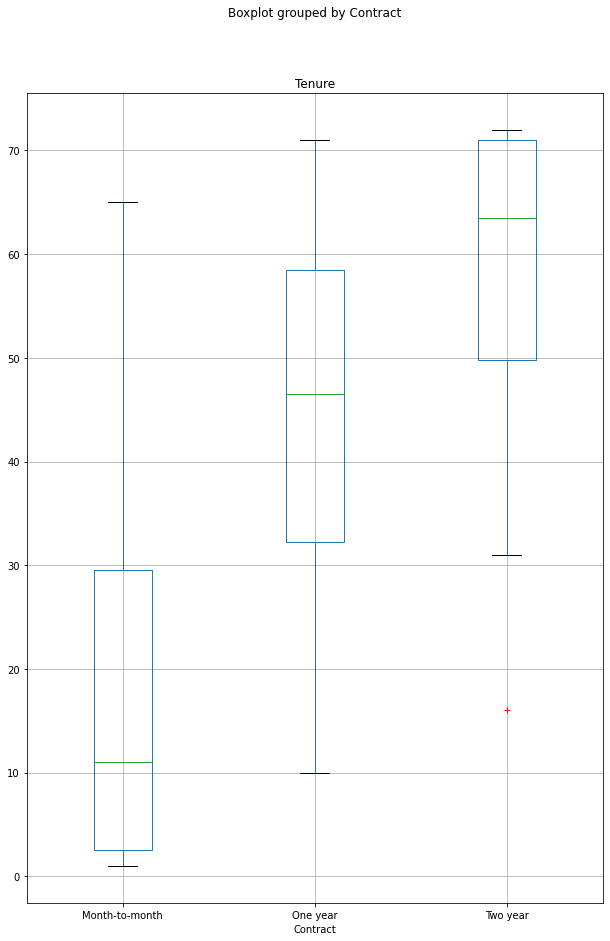

In [145]:
plt = df.toPandas().boxplot(sym='r+', column="Tenure", figsize=(10,15), by='Contract')

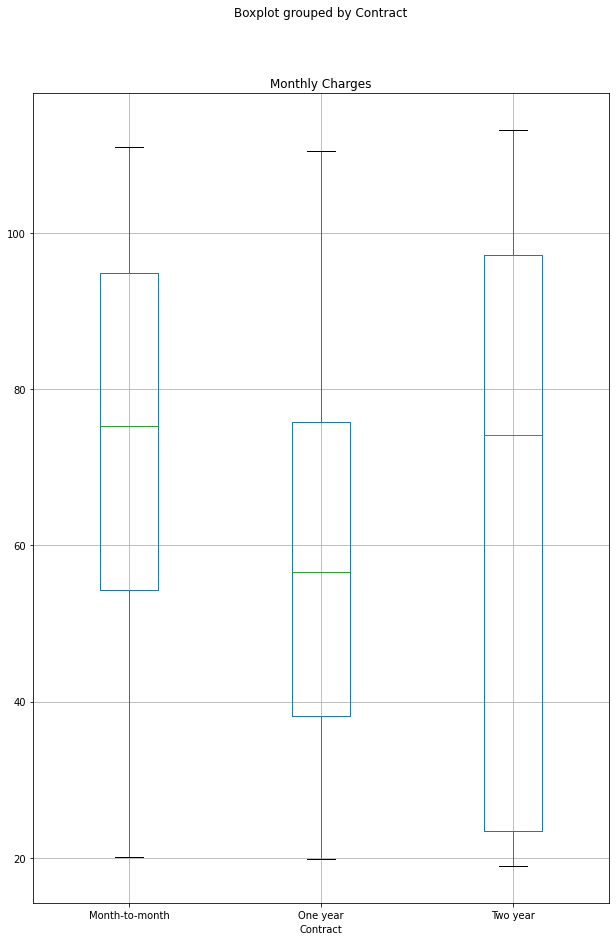

In [146]:
plt = df.toPandas().boxplot(sym='r+', column="Monthly Charges", figsize=(10,15), by="Contract")

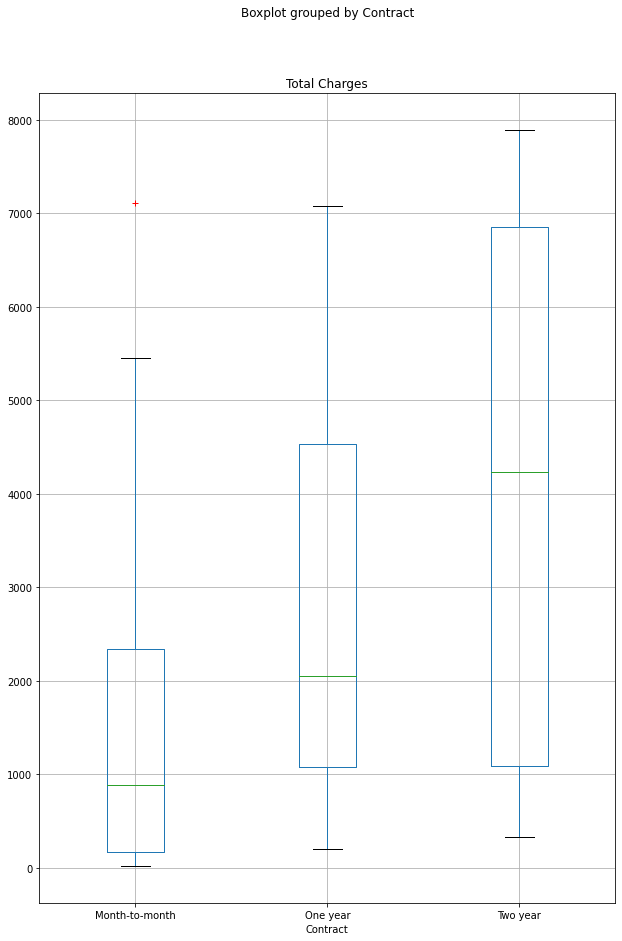

In [147]:
plt = df.toPandas().boxplot(sym='r+', column="Total Charges", figsize=(10,15),by="Contract")

#### Bar graph

<AxesSubplot:xlabel='Contract'>

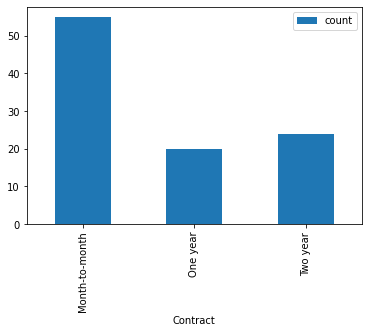

In [148]:
df_contracts = df.groupBy("Contract").count()
df_contracts.toPandas().plot.bar(x="Contract")

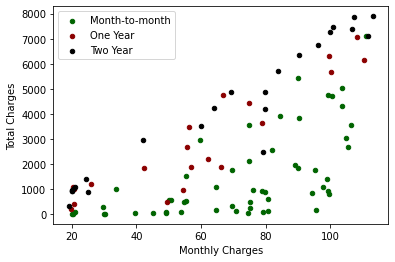

In [149]:
# Scatter Plot
%matplotlib inline
import matplotlib.pyplot as plt
ax = df.filter(df.Contract == "Month-to-month" ).toPandas().plot.scatter(x='Monthly Charges', y='Total Charges', color='DarkGreen', label='Month-to-month')
df.filter(df.Contract == "One year").toPandas().plot.scatter(x='Monthly Charges', y='Total Charges', color='DarkRed', label='One Year', ax=ax)
df.filter(df.Contract == "Two year").toPandas().plot.scatter(x='Monthly Charges', y='Total Charges', color='Black', label='Two Year', ax=ax)
# save_fig("scatter_plots")
plt.show()

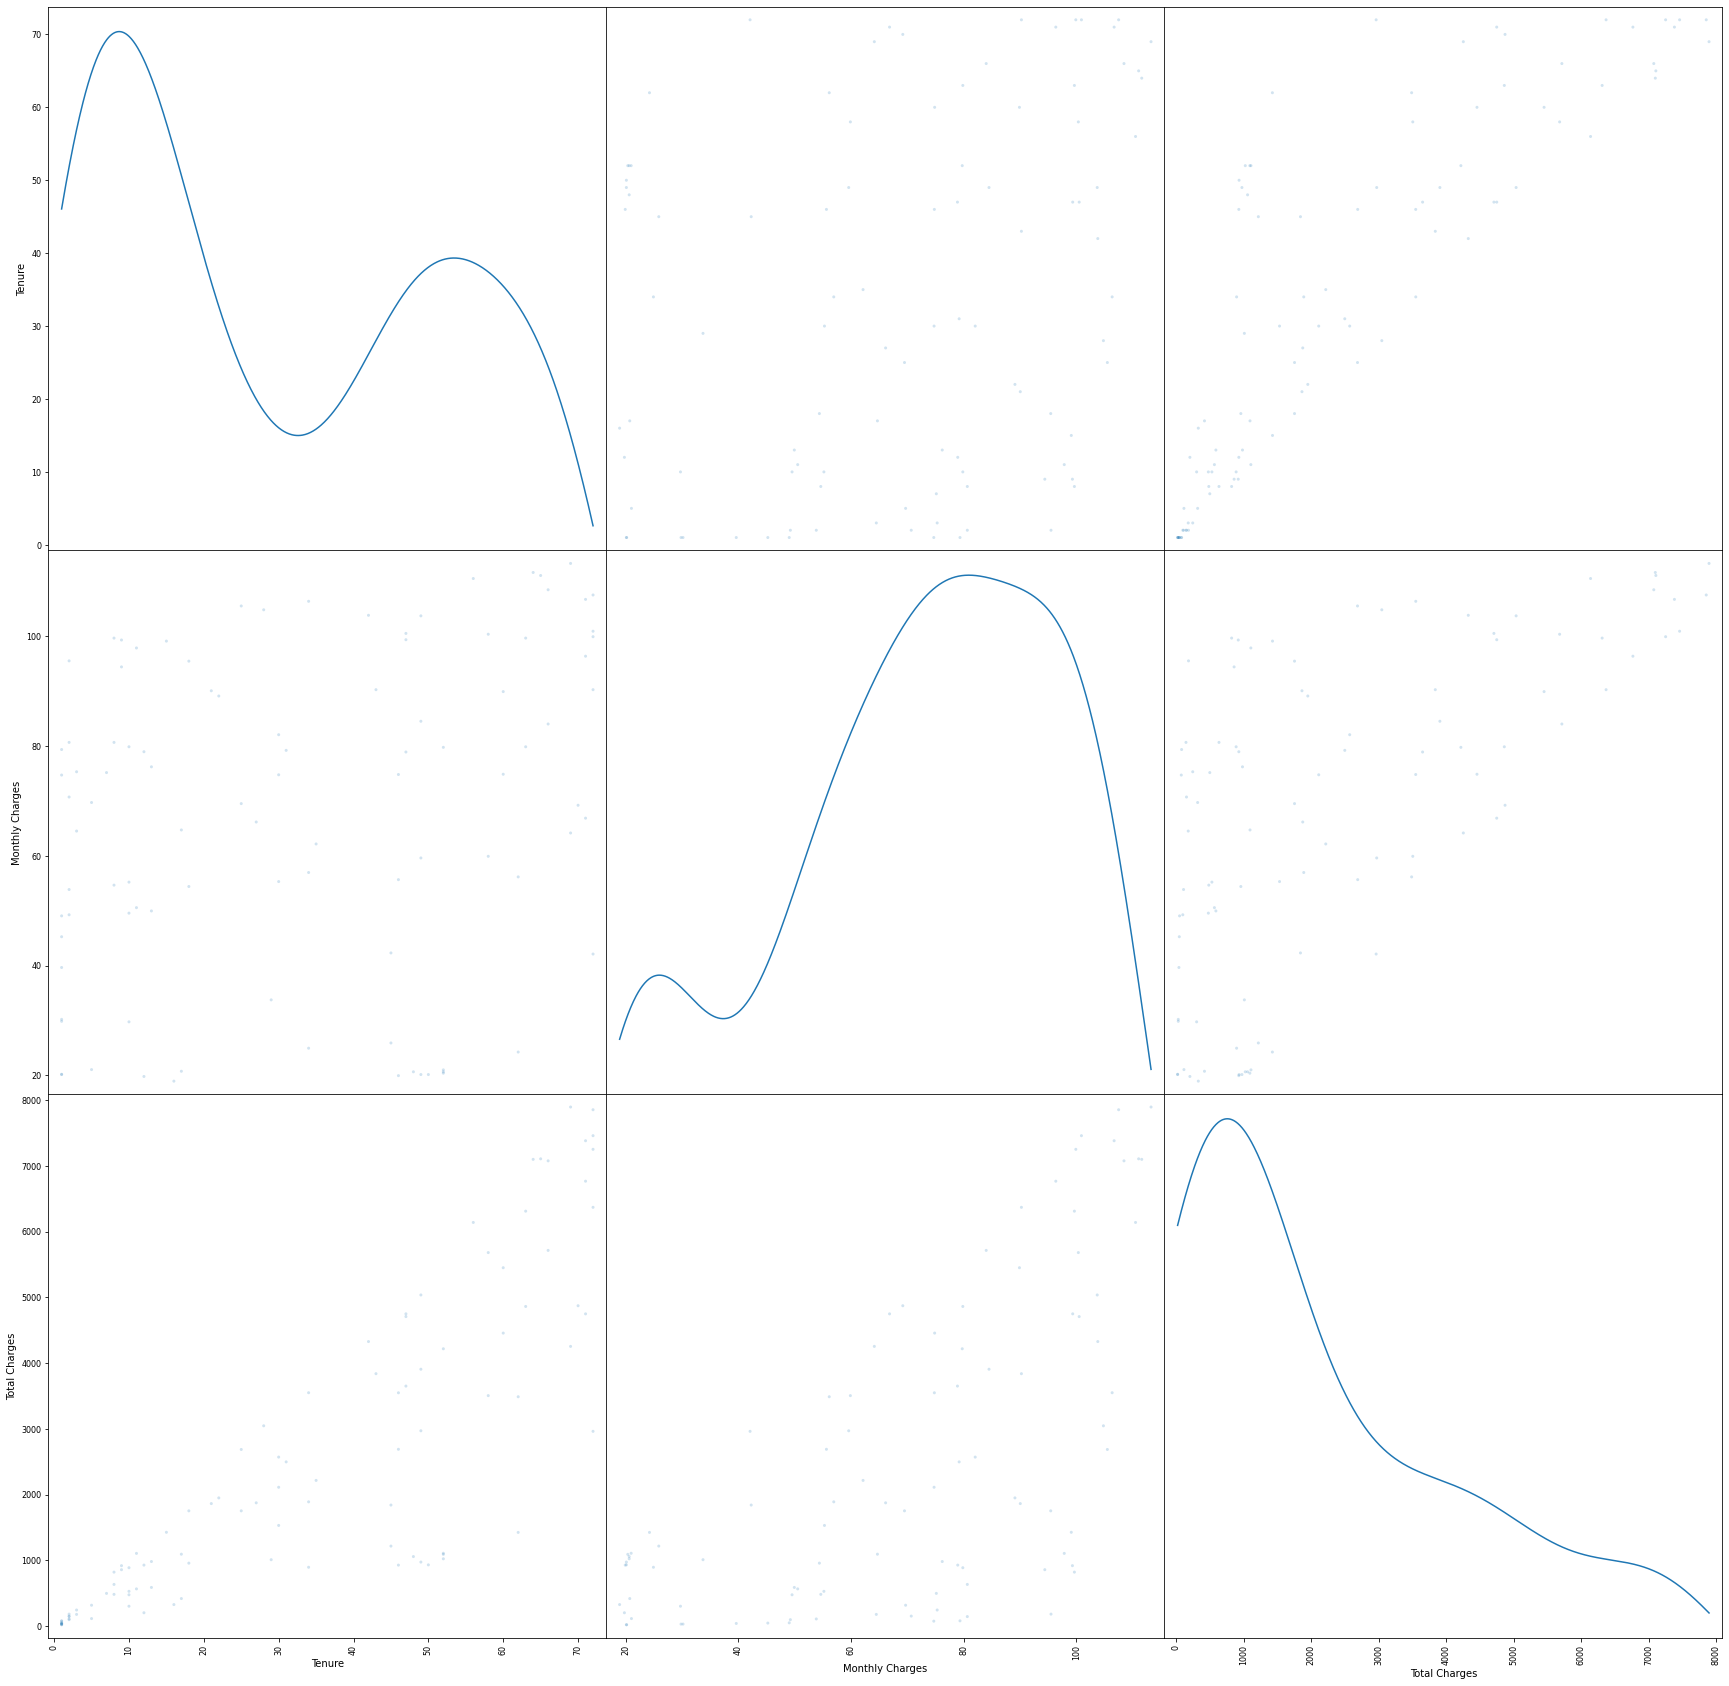

In [150]:
scatter_matrix(df.select("Tenure", "Monthly Charges", "Total Charges").toPandas(), alpha=0.2, figsize=(30, 30), diagonal='kde')
#save_fig("scatter_matrix")
plt.show()

<AxesSubplot:xlabel='Internet Service'>

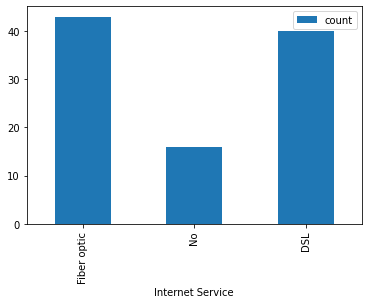

In [151]:
df_contracts = df.groupBy("Internet Service").count()
df_contracts.toPandas().plot.bar(x="Internet Service")

In [ ]:
df_contracts = df.groupBy("Internet Service").count()
df_contracts.toPandas().plot.bar(x="Internet Service")

In [152]:
spark.stop()